In [1]:
%matplotlib notebook
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py
import scipy.io

In [2]:
#size of output images is npix_detector
# oversample pads the pupil plane before performing ffts. This gives more accurate simulations of 
# image plane interactions. oversample=2 is generally too low for this application. 
# oversample=4 works well and doesn't take too long (see notebook'Oversample Comparison')
# 'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.

oversample = 4
wavelength=632e-9*u.m
coronagraph='fqpm'
npix_pupil = 512

npix_detector = 128
detector_fov = 0.3 #arcsec
detector_pixelscale = detector_fov/npix_detector
defocus = 15.0/(2*np.pi)
vortex_charge = 0
lyot_factor=0.9

In [3]:
highest_coeff = 15
rms_phase_mode = 10e-9

M = highest_coeff-1
N = npix_detector
wfe_array = np.zeros((M,M+1))

initial_array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(M+1):
    wfe_array[:,i] = initial_array
    
for i in range(M):
    wfe_array[i,i+1] = wfe_array[i,i+1] + rms_phase_mode
print(wfe_array[:,:3])
    

[[0.e+00 1.e-08 0.e+00]
 [0.e+00 0.e+00 1.e-08]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]]


In [4]:
data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus,vortex_charge=vortex_charge,lyot_factor=lyot_factor)

In [5]:
print(np.max(data[:,:,0]))
print(np.max(data[:,:,1]))

0.0001553535168414923
0.00016307690282310315


<IPython.core.display.Javascript object>


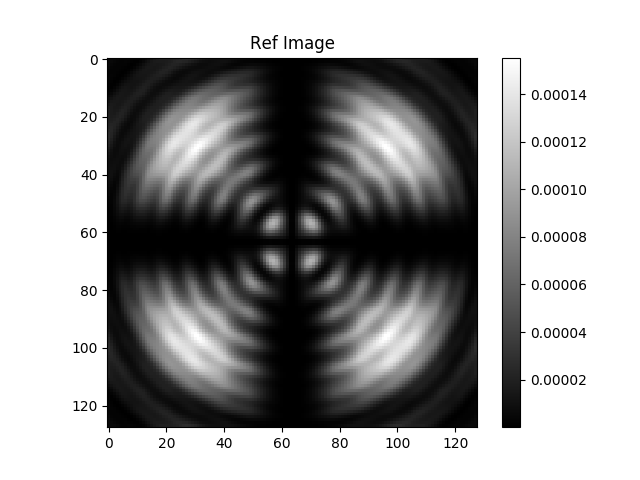

<IPython.core.display.Javascript object>


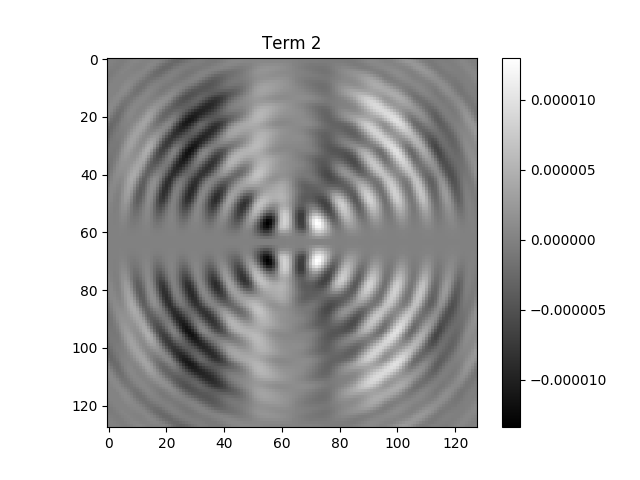

<IPython.core.display.Javascript object>


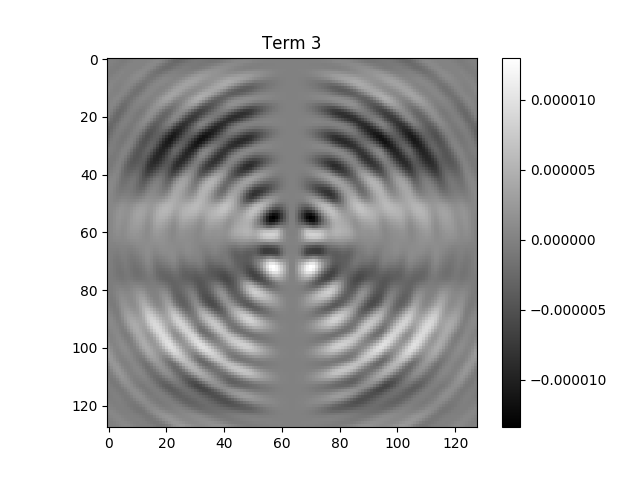

<IPython.core.display.Javascript object>


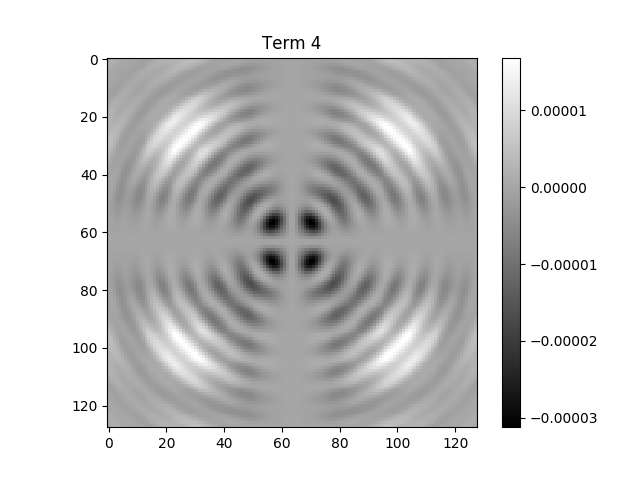

<IPython.core.display.Javascript object>


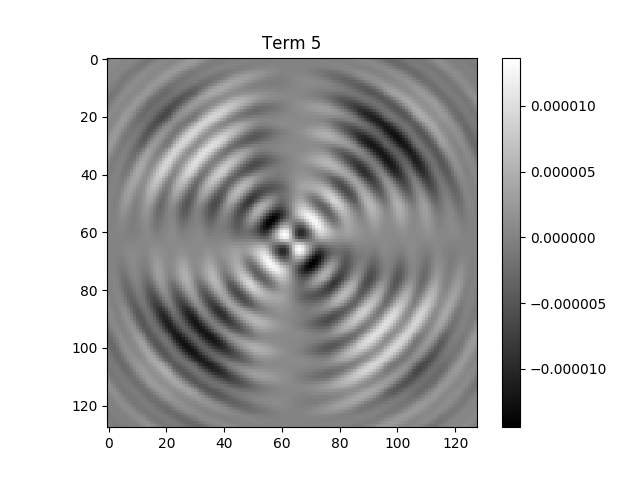

<IPython.core.display.Javascript object>


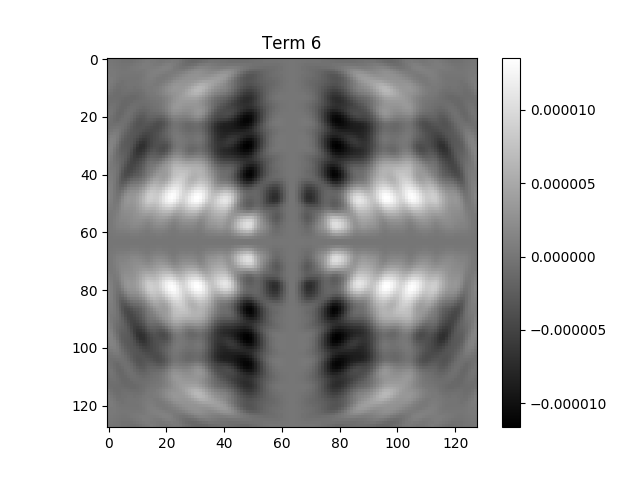

<IPython.core.display.Javascript object>


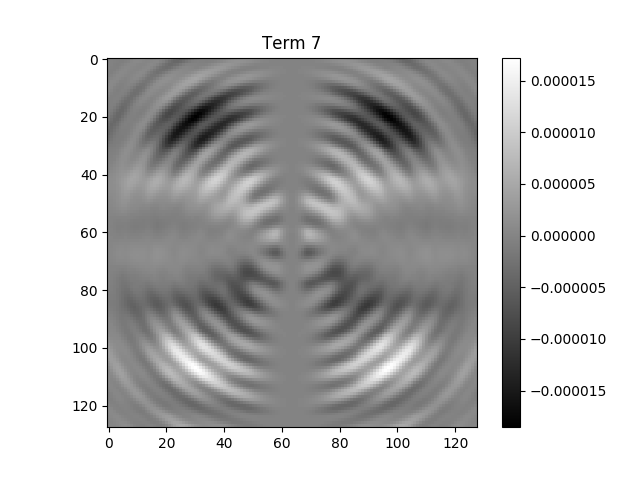

<IPython.core.display.Javascript object>


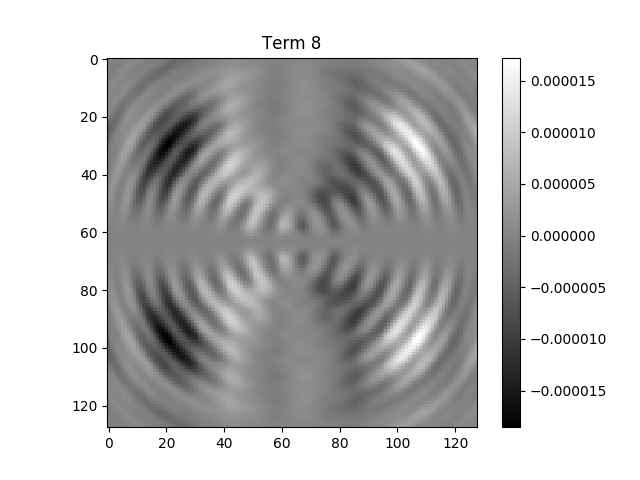

<IPython.core.display.Javascript object>


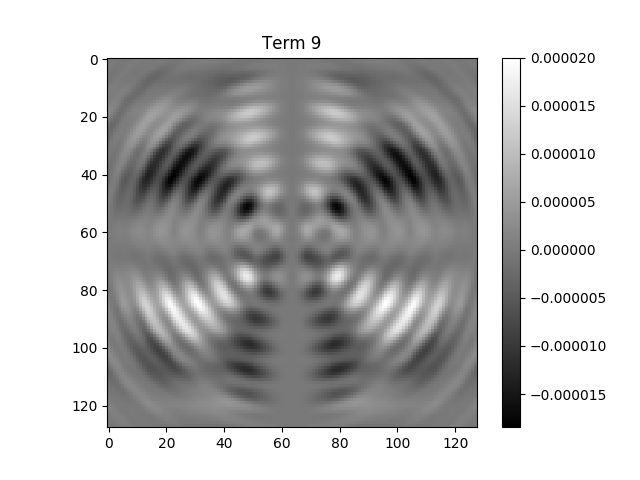

<IPython.core.display.Javascript object>


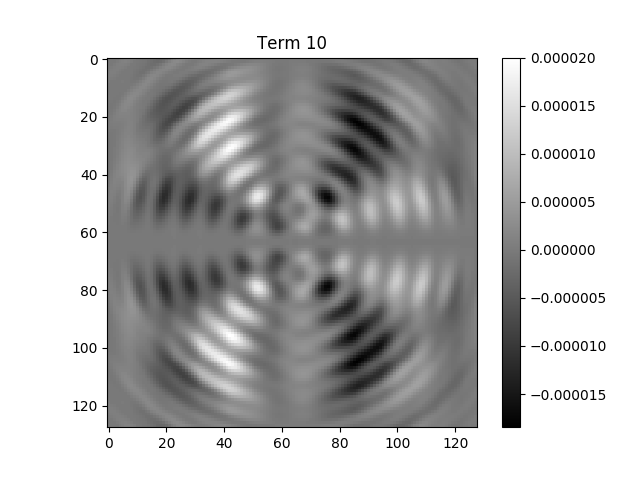

<IPython.core.display.Javascript object>


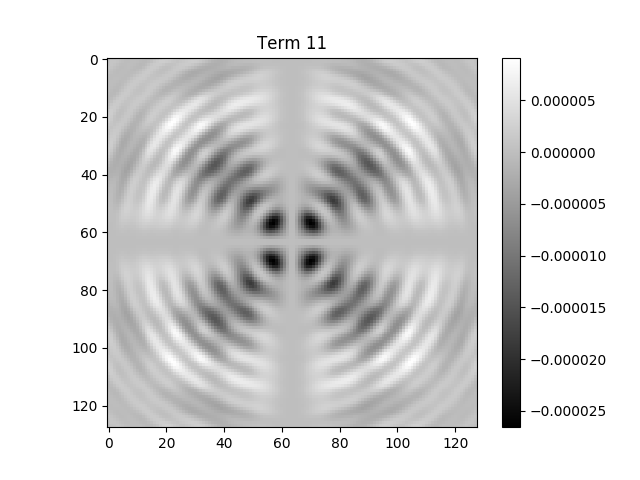

<IPython.core.display.Javascript object>


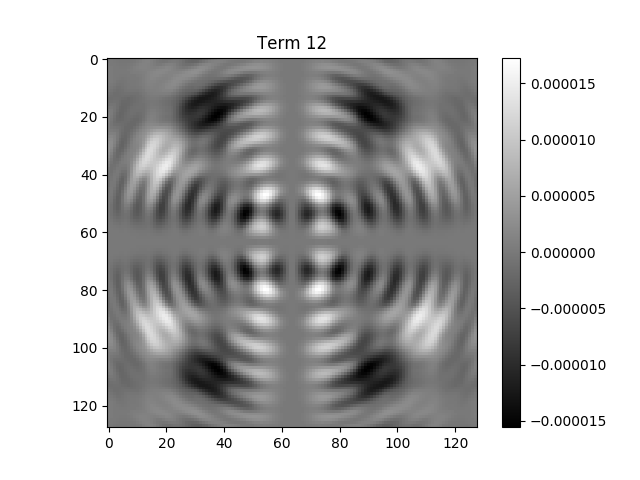

<IPython.core.display.Javascript object>


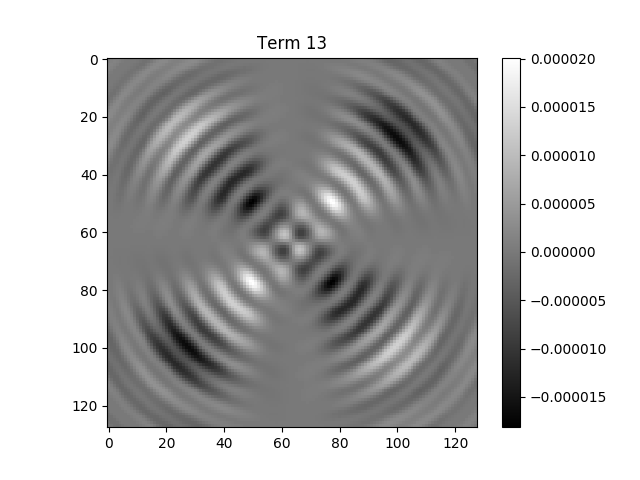

<IPython.core.display.Javascript object>


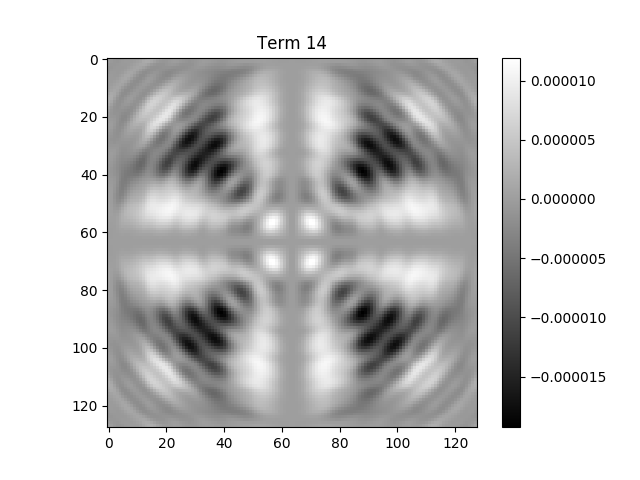

<IPython.core.display.Javascript object>


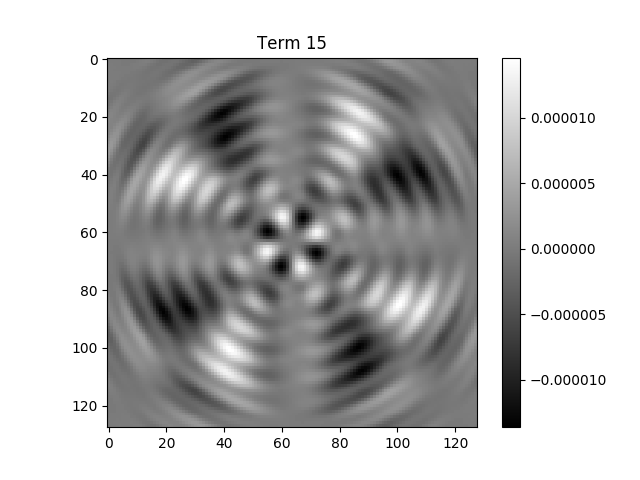

In [6]:
ref = data[:,:,0]
plt.figure()
plt.imshow(ref,cmap='gray')
plt.colorbar()
plt.title('Ref Image')
modes = np.zeros((N,N,M))
for i in range(M):
    modes[:,:,i] = data[:,:,i+1]-ref
    plt.figure()
    plt.imshow(modes[:,:,i],cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(i+2))
    

<IPython.core.display.Javascript object>


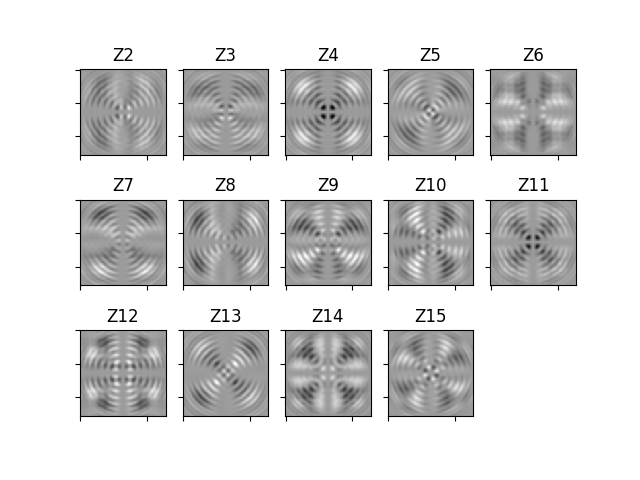

In [7]:
fig = plt.figure()
ax = fig.subplots(3,5)
cmax = np.max(modes)
cmin = np.min(modes)
for i in range(M):
    ax.flat[i].imshow(modes[:,:,i],cmap='gray',vmin=cmin,vmax=cmax)
    #ax[i].show_colorbar()
    ax.flat[i].set_title('Z'+str(i+2))
    ax.flat[i].set_xticklabels('')
    ax.flat[i].set_yticklabels('')
ax.flat[14].set_visible(False)

In [8]:
refdict = {'ref_image':ref}
scipy.io.savemat('ref_image_vortex_128px.mat',refdict)
modesdict = {'modes':modes}
scipy.io.savemat('cal_frames_vortex_128px.mat',modesdict)

In [9]:
A = np.zeros((N**2,M))
for i in range(M):
    A[:,i] = modes[:,:,i].ravel()

In [10]:
Apinv = np.linalg.pinv(A)
print(Apinv.shape)

(14, 16384)


In [11]:
testvec = modes[:,:,0].ravel()
print(testvec.shape)

(16384,)


In [12]:
np.dot(Apinv,testvec)

array([ 1.00000000e+00,  1.53956708e-16,  4.42354486e-17,  2.60208521e-17,
        1.32381085e-16,  1.99493200e-17,  7.14706072e-16, -3.77302356e-17,
       -9.88792381e-17, -3.38271078e-17,  9.94213392e-17,  1.83013327e-16,
       -6.67868538e-17,  6.89552582e-17])

In [13]:
max_rms_phase = 150e-9
nEx = 80
step = 2*max_rms_phase/nEx
test_zernike = 4-2

wfe_array_test = np.zeros((M,nEx))
for i in range(nEx):
    wfe_array_test[:,i] = initial_array
    wfe_array_test[test_zernike,i] += -1*max_rms_phase + step*i
print(wfe_array_test[:,:3])
print(wfe_array_test[test_zernike,:])


[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-1.5000e-07 -1.4625e-07 -1.4250e-07]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]]
[-1.5000e-07 -1.4625e-07 -1.4250e-07 -1.3875e-07 -1.3500e-07 -1.3125e-07
 -1.2750e-07 -1.2375e-07 -1.2000e-07 -1.1625e-07 -1.1250e-07 -1.0875e-07
 -1.0500e-07 -1.0125e-07 -9.7500e-08 -9.3750e-08 -9.0000e-08 -8.6250e-08
 -8.2500e-08 -7.8750e-08 -7.5000e-08 -7.1250e-08 -6.7500e-08 -6.3750e-08
 -6.0000e-08 -5.6250e-08 -5.2500e-08 -4.8750e-08 -4.5000e-08 -4.1250e-08
 -3.7500e-08 -3.3750e-08 -3.0000e-08 -2.6250e-08 -2.2500e-08 -1.8750e-08
 -1.5000e-08 -1

In [14]:
#print(wfe_array_test[:,60])

In [15]:
test_data = simulate_multiple_llowfs(wfe_array_test,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus,vortex_charge=vortex_charge)

<IPython.core.display.Javascript object>


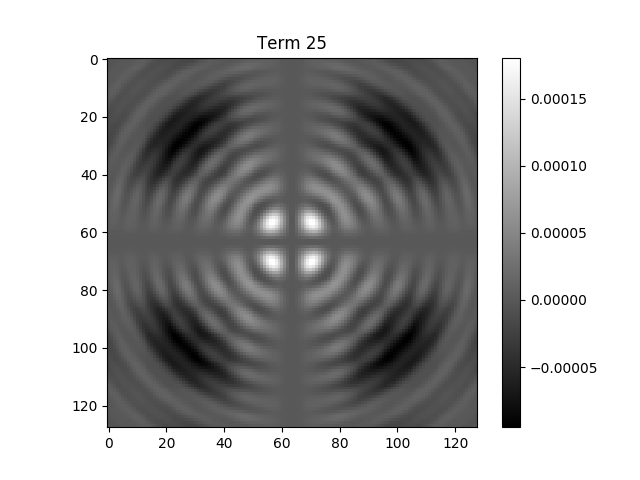

<IPython.core.display.Javascript object>


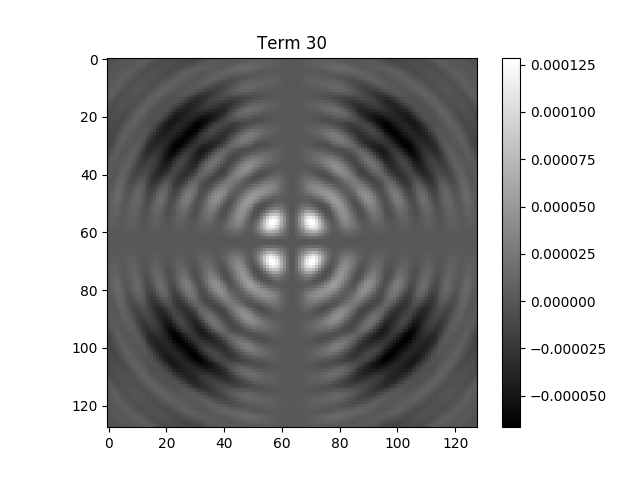

<IPython.core.display.Javascript object>


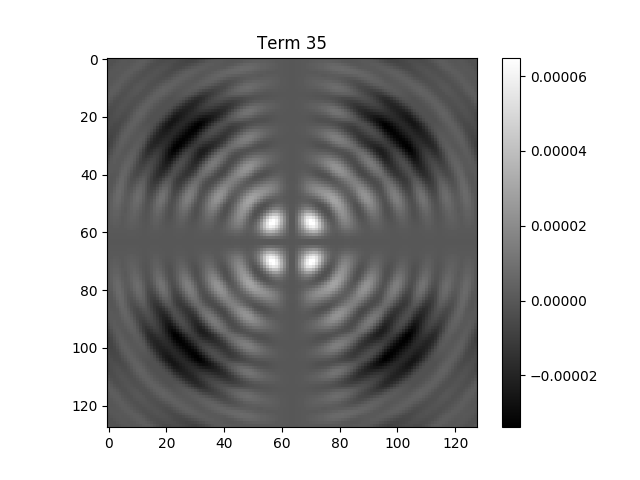

<IPython.core.display.Javascript object>


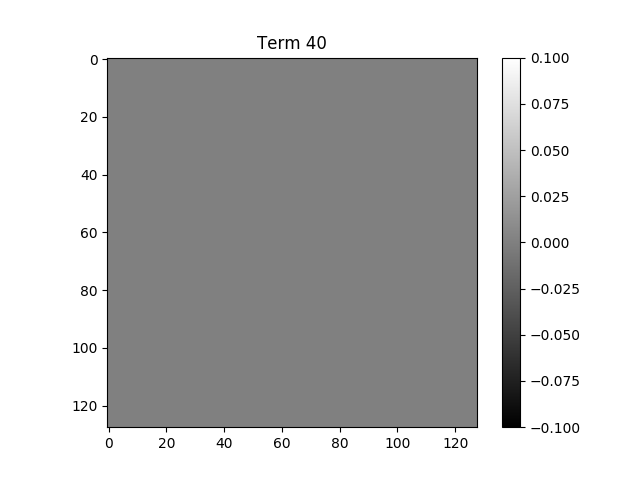

/Users/gregoryallan/repos/coronagraph-NN-data-gen/nn-gen-venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


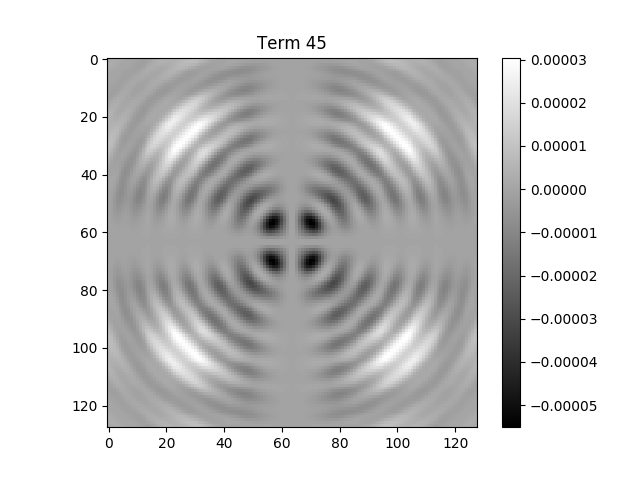

In [16]:
to_plot = [25,30,35,40,45]
#to_plot = [0,40,70,90]
for k in to_plot:
    plt.figure()
    plt.imshow(test_data[:,:,k]-ref,cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(k))

In [17]:
test_results = np.zeros((nEx,M))

for i in range(nEx):
    pixels = (test_data[:,:,i]-ref).ravel()
    calc_coeffs = np.dot(Apinv,pixels)*rms_phase_mode
    test_results[i,:] = calc_coeffs

In [18]:
print(test_results.shape)
print(test_results[23,:])

(80, 14)
[ 3.46429991e-09  1.95793193e-09 -5.63352231e-08  2.91262626e-09
  9.56367537e-10  1.85632013e-09  2.66467479e-10  1.80227817e-09
  1.57040130e-09  3.14604470e-09  2.10470535e-09  4.79171512e-10
  8.85522626e-09  2.44318535e-09]


[(0.0, 0.0, 0.502, 1.0), (0.0, 0.26598627808136, 0.2827249433106577, 1.0), (0.0, 0.3874016993464051, 1.0, 1.0), (0.0, 0.930796862745098, 1.0, 1.0), (0.0, 0.9804, 0.5731160158460669, 1.0), (0.14987017543859635, 0.940799477124183, 0.0, 1.0), (0.4537607843137255, 0.9104032258064516, 0.0, 1.0), (0.6967515786278082, 1.0, 0.20299988662131535, 1.0), (1.0, 0.9710620522161504, 0.0, 1.0), (1.0, 0.8066418943533695, 0.021098823529411777, 1.0), (1.0, 0.44038591378263514, 0.021972448979591816, 1.0), (1.0, 0.055951700680272, 0.0, 1.0), (0.9462666666666665, 0.026863261296660175, 1.0, 1.0), (0.7377776686313035, 0.31468245294474795, 0.971711414693382, 1.0), (0.9486490196078431, 0.6636764705882352, 0.9555771241830066, 1.0), (0.9961, 0.9725, 0.9961, 1.0)]


<IPython.core.display.Javascript object>


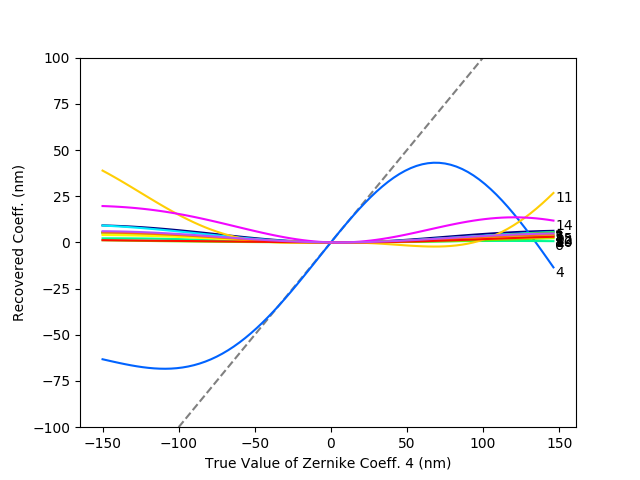

(-100, 100)

In [19]:
to_plot = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#colormap = plt.cm.nipy_spectral
colormap = plt.cm.gist_ncar
colorcycle = [colormap(c) for c in np.linspace(0, 1,len(to_plot)+2)]
print(colorcycle)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_prop_cycle(color=colorcycle)
ax1.plot([-100,100],[-100,100],linestyle='--',color='grey')
for i in to_plot:
    ax1.text((wfe_array_test[test_zernike,-1]+1e-9)*1e9,(test_results[-1,i])*1e9-5,str(to_plot[i]+2))
    ax1.plot(wfe_array_test[test_zernike,:]*1e9,test_results[:,i]*1e9)
ax1.set_xlabel('True Value of Zernike Coeff. ' + str(test_zernike+2) + ' (nm)')
ax1.set_ylabel('Recovered Coeff. (nm)')
ax1.set_ylim([-100,100])
#plt.show()

In [20]:
# rms_phase_mode = rms_phase_mode
# max_rms_phase = 100e-9
# nExDefoc = 30
# step = 2*max_rms_phase/nExDefoc
# defoc_input_zernike = 11-2
# defoc_test_zernike = 4-2
# wfe_array_defoc_test = np.zeros((M,nExDefoc))
# for i in range(nExDefoc):
#     wfe_array_defoc_test[defoc_input_zernike,i] += -1*max_rms_phase + step*i

In [21]:
# #plot defocus response with different values of defocus
# #defocus_radians = np.arange(0,3*np.pi,np.pi/4)
# #defocus_radians = np.array([4,5,6,7])
# #defocus_radians = np.linspace(6.0,12.0,7)
# defocus_radians = np.linspace(12.0,36,15)
# #lyot_factor = np.linspace(0.8,1.0,10)
# defocus_waves = defocus_radians/(2*np.pi)
# nDef = np.size(defocus_waves)
# #nDef = np.size(lyot_factor)
# lyot_factor = 0.9
# defoc_results = np.zeros((nExDefoc,nDef))

# for k,defoc in enumerate(defocus_waves):
# #for k,lyot_f in enumerate(lyot_factor):
#     wfe_array = np.zeros((M,M+1))
#     for i in range(M):
#         wfe_array[i,i+1] = rms_phase_mode
#     data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,\
#                     coronagraph=coronagraph,pixelscale=detector_pixelscale,lyot_factor=lyot_factor,\
#                     npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc,vortex_charge=vortex_charge)
#     ref = data[:,:,0]
#     modes = np.zeros((N,N,M))
#     for i in range(M):
#         modes[:,:,i] = data[:,:,i+1]-ref
#     A = np.zeros((N**2,M))
#     for i in range(M):
#         A[:,i] = modes[:,:,i].ravel()
#     Apinv = np.linalg.pinv(A)
#     defoc_test_data = simulate_multiple_llowfs(wfe_array_defoc_test,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc,vortex_charge=vortex_charge,lyot_factor=lyot_factor)
#     test_results = np.zeros((nExDefoc,M))
#     for i in range(nExDefoc):
#         pixels = (defoc_test_data[:,:,i]-ref).ravel()
#         calc_coeffs = np.dot(Apinv,pixels)*rms_phase_mode
#         test_results[i,:] = calc_coeffs
    
#     defoc_results[:,k] = test_results[:,defoc_test_zernike]


In [22]:
# colormap = plt.cm.nipy_spectral
# #nipy_spectral
# colorcycle = [colormap(c) for c in np.linspace(0, 1,nDef)]
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# ax1.set_prop_cycle(color=colorcycle)
# ax1.plot([-100,100],[-100,100],linestyle='--',color='grey')
# for i in range(nDef):
#     ax1.plot(wfe_array_defoc_test[defoc_input_zernike,:]*1e9,defoc_results[:,i]*1e9)
#     #ax1.text(wfe_array_defoc_test[2,-1]*1e9,defoc_results[-1,i]*1e9,str(defocus_radians[i]))
# ax1.legend(['y=x']+[str(d) for d in defocus_radians])
# #ax1.legend(['y=x']+[str(d) for d in lyot_factor])
# lyot_factor
# ax1.set_xlim([-105,120])
# ax1.set_ylim([-85,120])
# ax1.set_xlabel('Amplitude of focus aberration (nm RMS)')
# ax1.set_ylabel('Measured focus aberration (nm RMS)')

In [23]:
# #plot difference of spherical and defocus modes for different values of sensor defocus
# defocus_radians = np.array([-5,5,10,20,30,40,50])
# defocus_waves = defocus_radians/(2*np.pi)
# nDef = np.size(defocus_waves)

# wfe_ref_foc_sph = np.zeros((M,3))
# wfe_ref_foc_sph[2,1] = 1e-9
# wfe_ref_foc_sph[9,2] = 1e-9

# refs = np.zeros((N,N,nDef))
# modes_foc = np.zeros((N,N,nDef))
# modes_sph = np.zeros((N,N,nDef))

# for k,defoc in enumerate(defocus_waves):
#     data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,\
#                     coronagraph='fqpm',pixelscale=detector_pixelscale,\
#                     npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc,obscuration=True)
#     refs[:,:,k] = data[:,:,0]
#     modes_foc[:,:,k] = data[:,:,1]
#     modes_sph[:,:,k] = data[:,:,2]
    
    

In [24]:
# fom = np.zeros((nDef,))
# for i in range(nDef):
#     fom[i] = np.max(np.abs(modes_foc[:,:,i]-modes_sph[:,:,i])/np.max(refs[:,:,i]))
# plt.figure()
# plt.plot(defocus_radians,fom,'.')
# plt.title('Comparison of Defocus and Spherical Modes')
# plt.xlabel('Sensor Defocus (rad)')
# plt.ylabel('Norm. Diff in Response')

In [25]:
file = 'fqpm_Z15_individual_400st_948nm_128px_15rad.hdf5'
#file = 'fqpm_50nm_256px_individual_zernikes.hdf5'
with h5py.File(file, 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(14, 5600)
(128, 128, 5600)


In [26]:
print(coeffs[:,:3])

[[-9.48000000e-07 -9.43248120e-07 -9.38496241e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [27]:
K = 400
coeffs_sep = np.zeros((M,K,M))

In [28]:
for i in range(M):
    coeffs_sep[:,:,i] = coeffs[:,i*K:(i+1)*K]

In [29]:
coeffs_sep[:,:3,2]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.48000000e-07, -9.43248120e-07, -9.38496241e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [30]:
rec_coeffs = np.zeros(coeffs_sep.shape)
for i in range(M): #loop over coefficients
    for j in range(K): #loop over examples
        vec = np.reshape(images[:,:,i*K+j]-ref,(-1,)) 
        rec_coeffs[:,j,i] = np.dot(Apinv,vec)

In [31]:
print(rec_coeffs[:,:3,0])

[[ 0.05184437 -0.01871276 -0.08934195]
 [ 0.42962616  0.43148271  0.43331956]
 [-3.25619321 -3.18995636 -3.12531975]
 [ 0.40035447  0.40201733  0.40397472]
 [ 0.28160321  0.29261092  0.30265132]
 [ 0.43667322  0.43292205  0.42925147]
 [-2.8546526  -2.84737467 -2.83818956]
 [ 0.29973176  0.29994723  0.30028477]
 [ 0.90524568  0.90548984  0.90656935]
 [ 6.21311022  6.15259149  6.09282179]
 [ 0.82078108  0.79514252  0.76820919]
 [ 0.290268    0.28573211  0.28103835]
 [ 1.27247564  1.29865781  1.32365901]
 [ 0.28344811  0.28268514  0.28196648]]


<IPython.core.display.Javascript object>


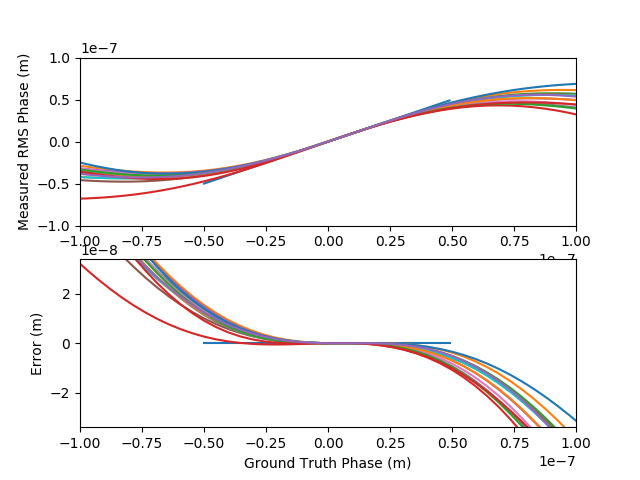

In [32]:
fig,ax = plt.subplots(2,1)
line1 = np.arange(-5e-8,5e-8,1e-9)
line0 = np.zeros(line1.shape)
ax[0].plot(line1,line1)
ax[1].plot(line1,line0)
for i in range(M):
#for i in [2,1,]:
    ax[0].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase_mode)
    #ax[0].axis('equal')
    ax[0].set_xlim([-100e-9,100e-9])
    ax[0].set_ylim([-100e-9,100e-9])
    ax[0].set_ylabel('Measured RMS Phase (m)')
    #ax[0].legend(['None','1','2','3','4','5','6'])
    ax[1].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase_mode-coeffs_sep[i,:,i])
    ax[1].axis('equal')
    ax[1].set_xlim([-100e-9,100e-9])
    ax[1].set_ylim([-10e-9,10e-9])
    ax[1].set_ylabel('Error (m)')
    ax[1].set_xlabel('Ground Truth Phase (m)')

<IPython.core.display.Javascript object>


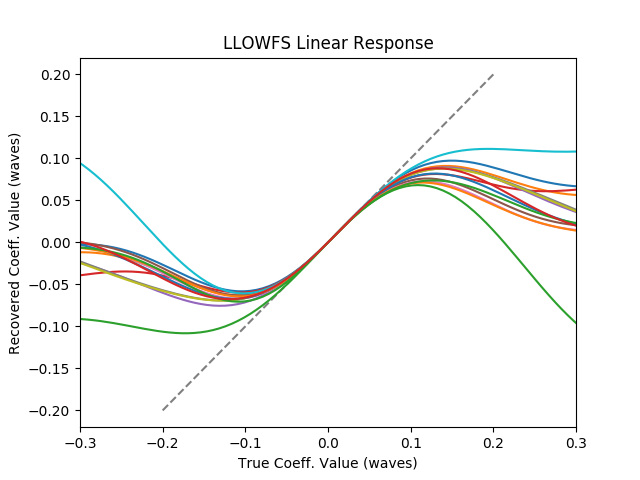

Text(0.5, 1.0, 'LLOWFS Linear Response')

In [33]:
plt.figure()
plt.plot([-0.2,0.2],[-0.2,0.2],linestyle='--',color='grey')
for i in range(M):
#for i in [2,1,]:
    truthWaves = coeffs_sep[i,:,i]/wavelength
    recWaves = rec_coeffs[i,:,i]*rms_phase_mode/wavelength
    plt.plot(truthWaves,recWaves)
plt.xlim([-0.3,0.3])
plt.xlabel('True Coeff. Value (waves)')
plt.ylabel('Recovered Coeff. Value (waves)')
plt.title('LLOWFS Linear Response')

<IPython.core.display.Javascript object>


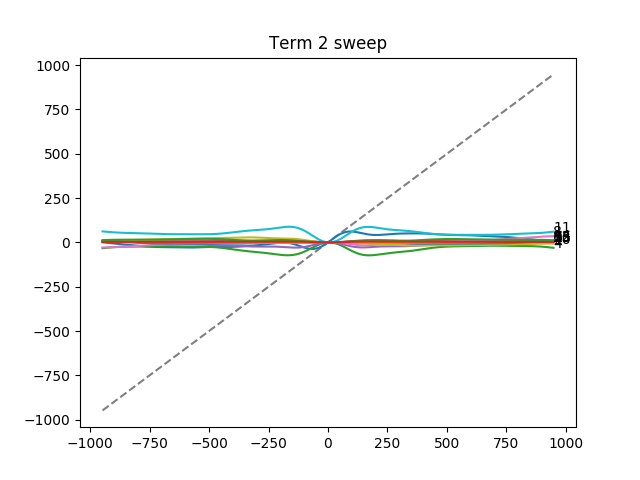

<IPython.core.display.Javascript object>


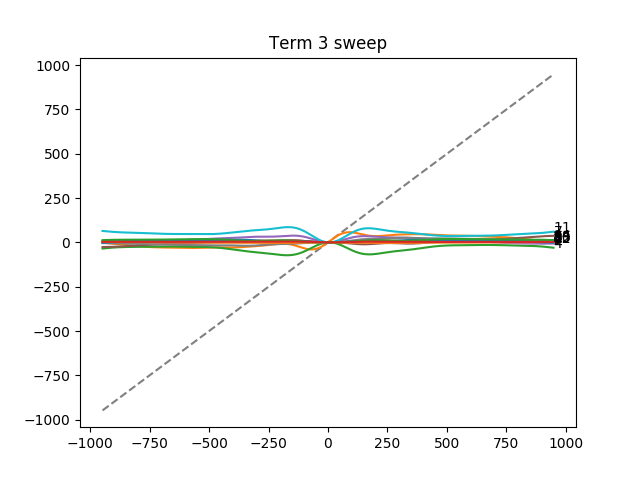

<IPython.core.display.Javascript object>


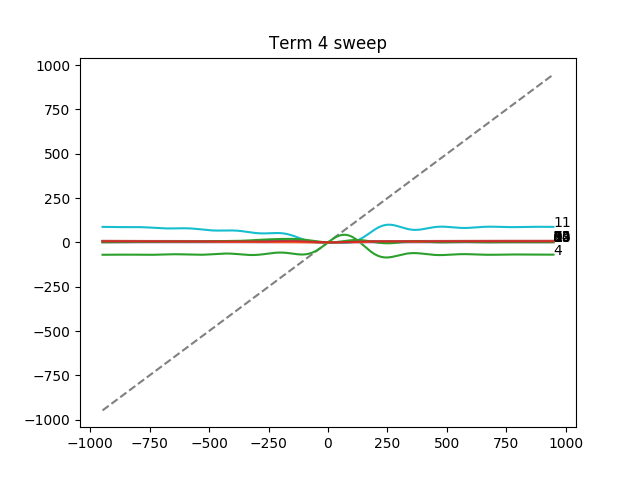

<IPython.core.display.Javascript object>


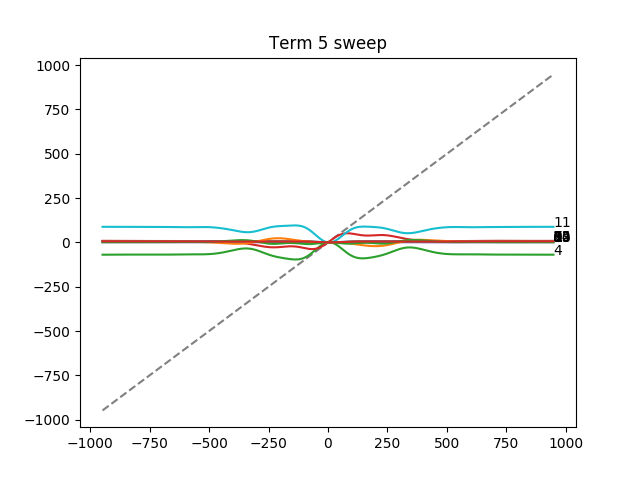

<IPython.core.display.Javascript object>


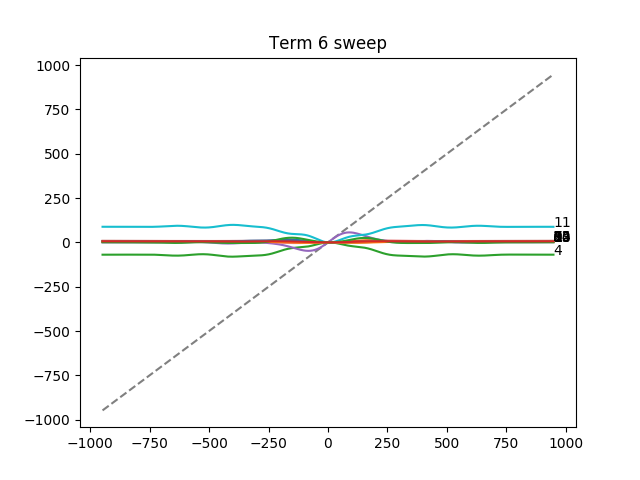

<IPython.core.display.Javascript object>


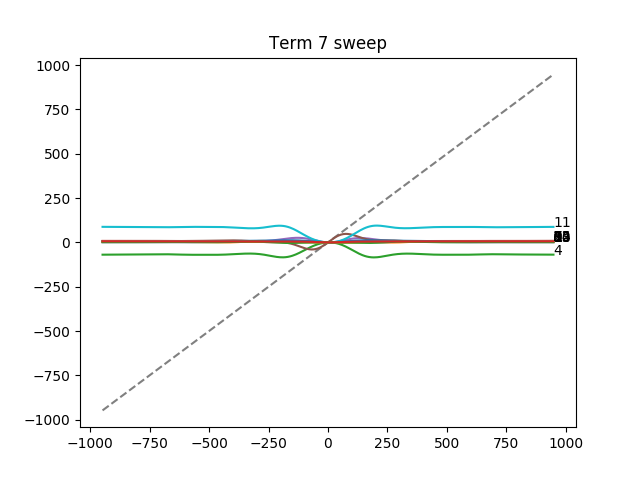

<IPython.core.display.Javascript object>


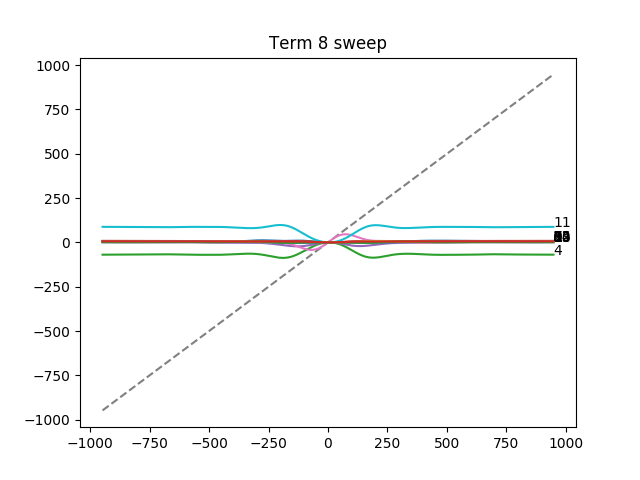

<IPython.core.display.Javascript object>


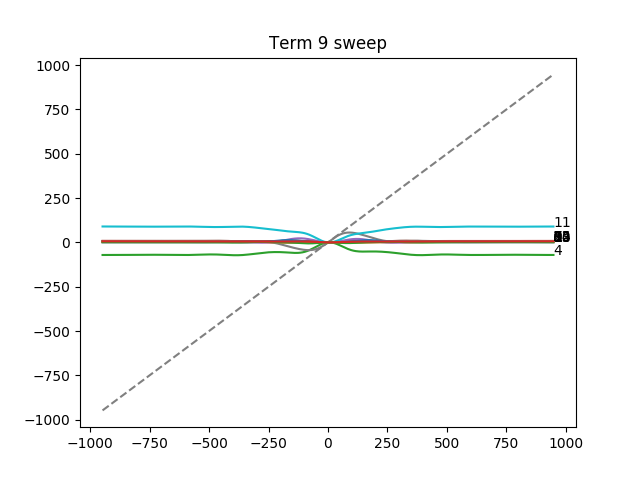

<IPython.core.display.Javascript object>


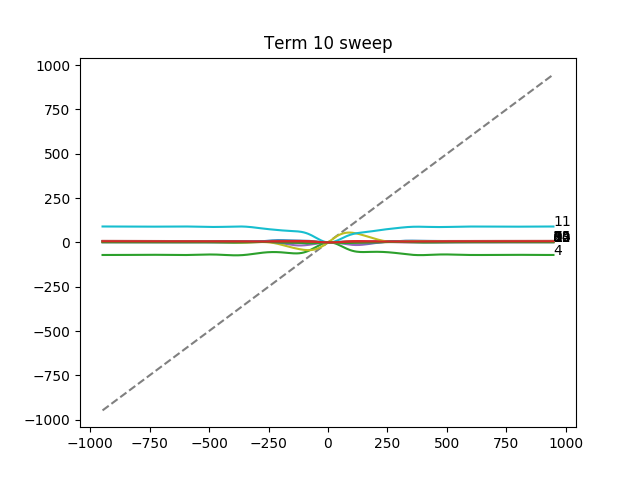

<IPython.core.display.Javascript object>


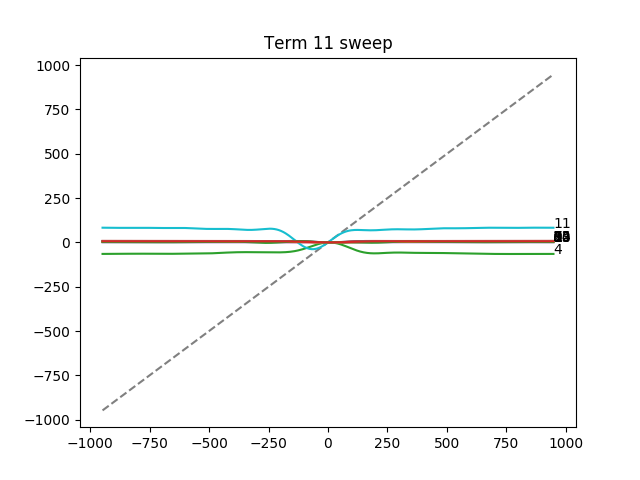

<IPython.core.display.Javascript object>


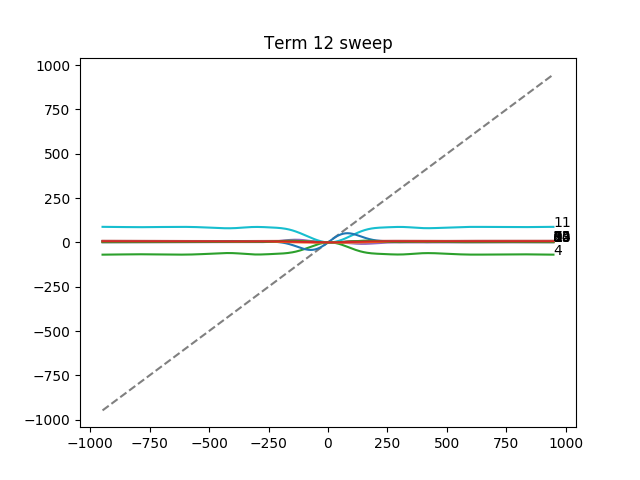

<IPython.core.display.Javascript object>


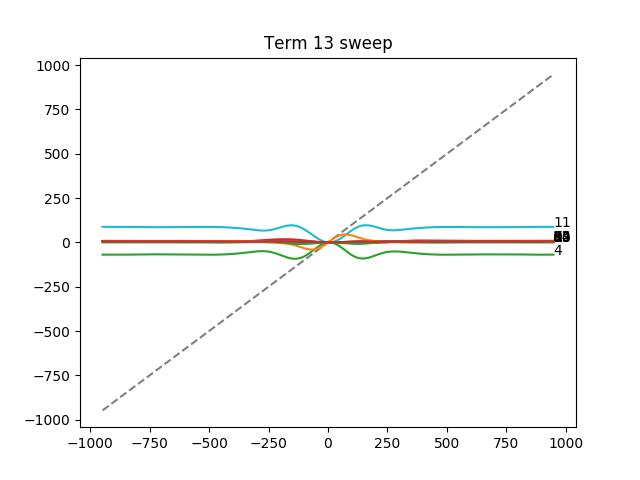

<IPython.core.display.Javascript object>


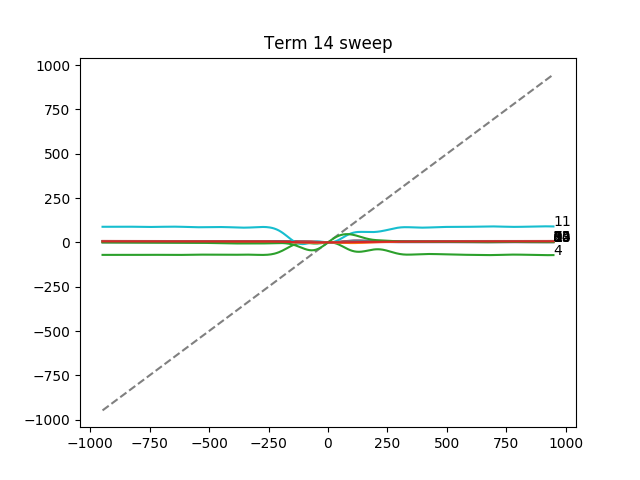

<IPython.core.display.Javascript object>


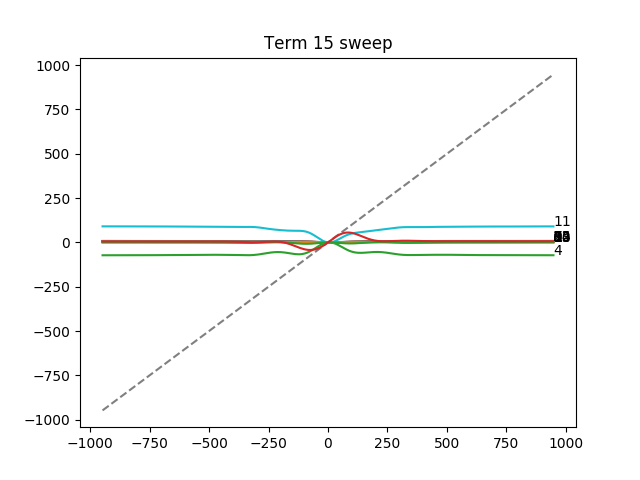

In [37]:

for ii in range(M):
    plt.figure()
    plt.title('Term ' + str(ii+2) + ' sweep')
    plt.plot([-948,948],[-948,948],"--",color='grey')
#for i in [2,1,]:
    for jj in range(M):
        plt.plot(coeffs_sep[ii,:,ii]*1e9,rec_coeffs[jj,:,ii]*rms_phase_mode*1e9)
        plt.text(coeffs_sep[ii,-1,ii]*1e9,rec_coeffs[jj,-1,ii]*rms_phase_mode*1e9,str(jj+2))
        #plt.set_ylabel('Measured RMS Phase (m)')



In [35]:
truth = np.zeros((K,M))
reconstruction = np.zeros((K,M))
for i in range (M):
    truth[:,i] = coeffs_sep[i,:,i]
    reconstruction[:,i] = rec_coeffs[i,:,i]
    
mat_out = {
    'truth':truth,
    'reconstruction':reconstruction
}

scipy.io.savemat('linear_llowfs',mat_out)

In [38]:
mat_out = {    
    'truth':coeffs_sep,
    'reconstruction':rec_coeffs
}
scipy.io.savemat('linear_reg_07152020',mat_out)

<IPython.core.display.Javascript object>


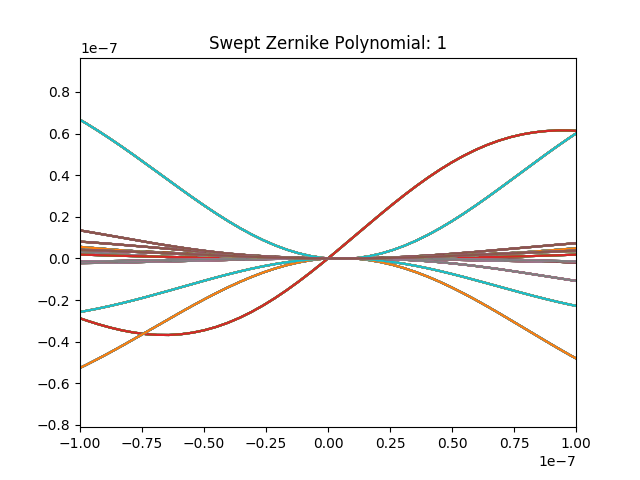

<IPython.core.display.Javascript object>


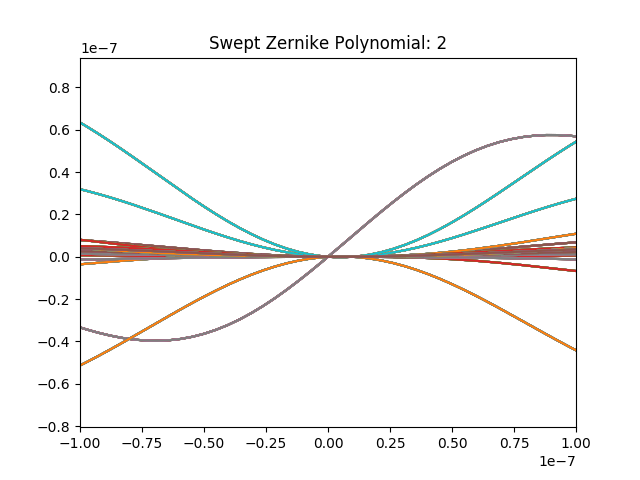

<IPython.core.display.Javascript object>


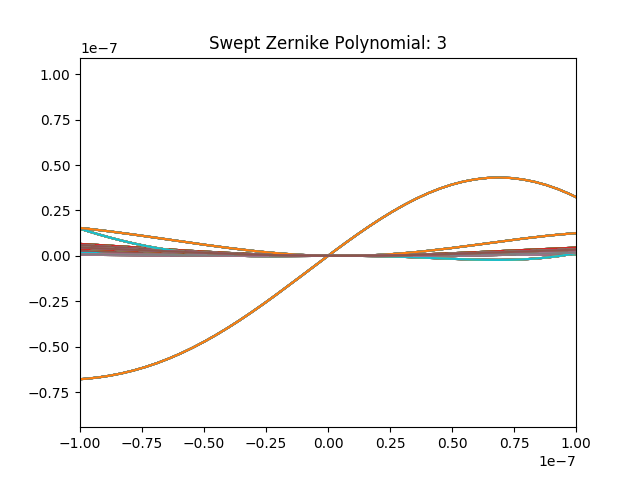

<IPython.core.display.Javascript object>


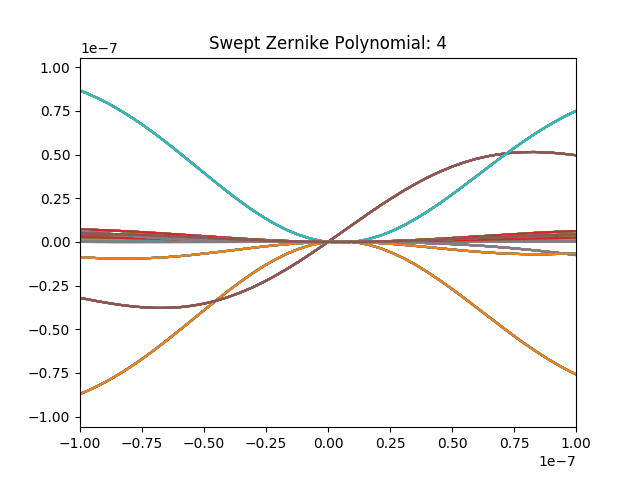

<IPython.core.display.Javascript object>


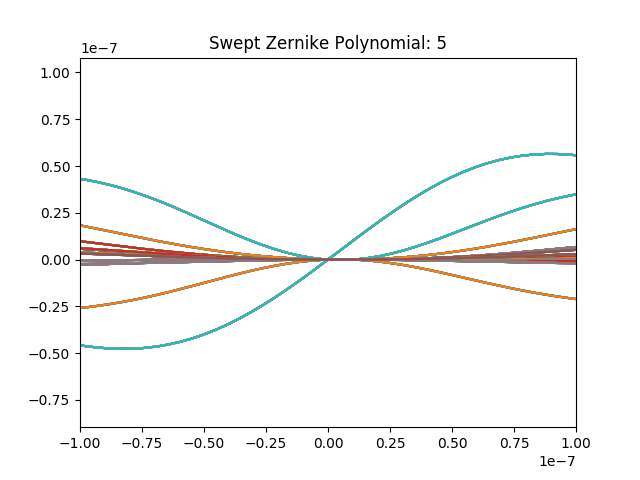

<IPython.core.display.Javascript object>


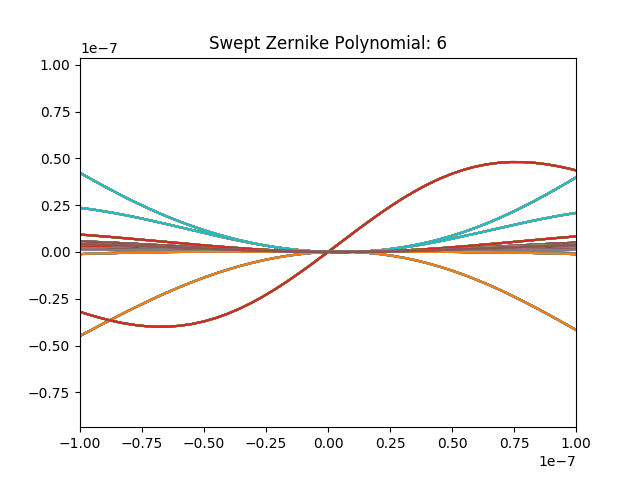

<IPython.core.display.Javascript object>


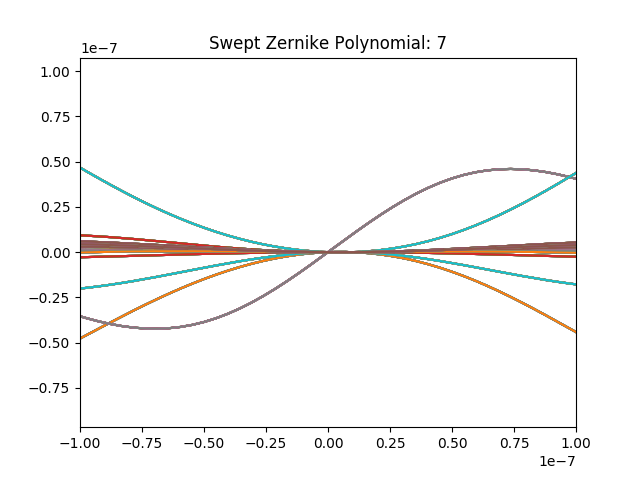

<IPython.core.display.Javascript object>


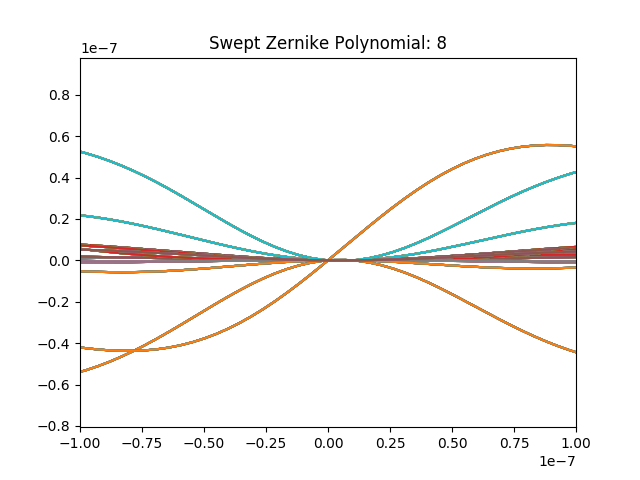

<IPython.core.display.Javascript object>


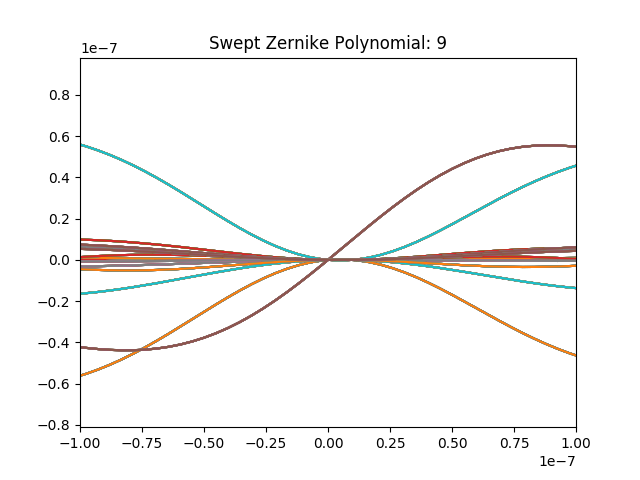

<IPython.core.display.Javascript object>


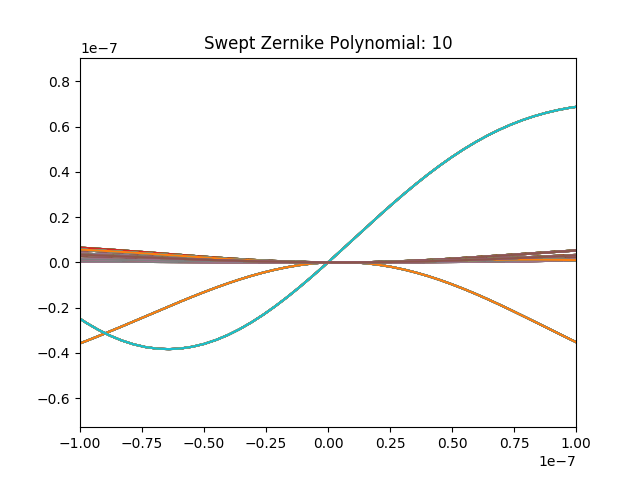

<IPython.core.display.Javascript object>


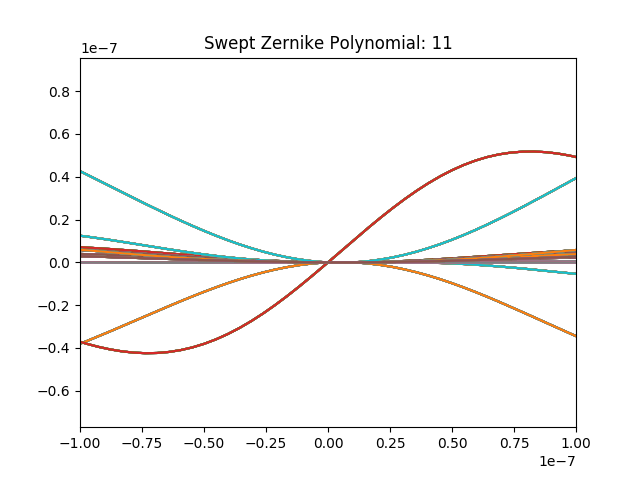

<IPython.core.display.Javascript object>


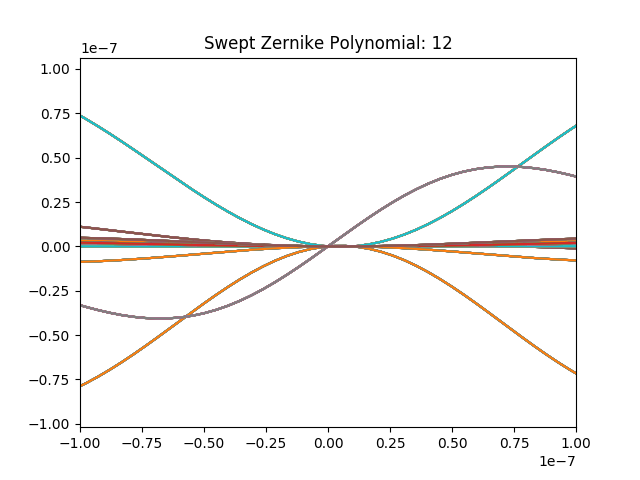

<IPython.core.display.Javascript object>


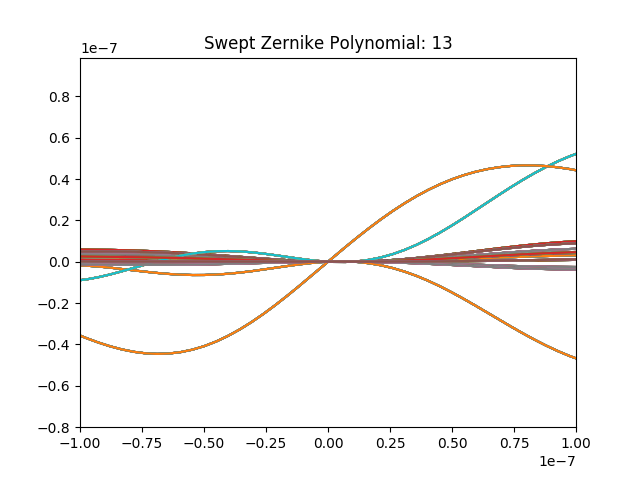

<IPython.core.display.Javascript object>


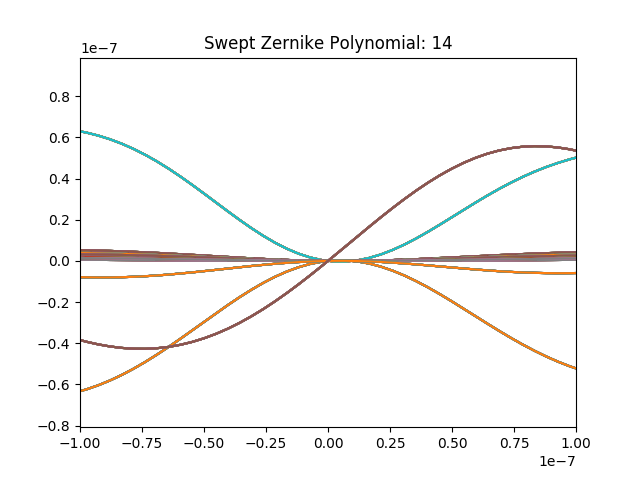

In [36]:
for i in range(M): #loop over coefficients
    plt.figure()
    #for j in range(K): #loop over examples
    truth[:,i] = coeffs_sep[i,:,i]
    for k in range(M): 
        resultsvec = rec_coeffs[k,:,i]*rms_phase_mode
        plt.plot(truth,resultsvec)
        plt.xlim([-100.0*1e-9,100.0*1e-9])
    plt.title('Swept Zernike Polynomial: '+str(i+1))
        #plt.ylim([-50,50])